In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from StringIO import StringIO

In [13]:
sns.set()

### Generating a permutation sample
100xp

In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.


    Concatenate the two input arrays into one using np.concatenate(). Be sure to pass in data1 and data2 as one argument (data1, data2).
    Use np.random.permutation() to permute the concatenated array.
    Store the first len(data1) entries of permuted_data as perm_sample_1 and the last len(data2) entries of permuted_data as perm_sample_2. In practice, this can be achieved by using :len(data1) and len(data1): to slice permuted_data.
    Return perm_sample_1 and perm_sample_2.


In [3]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [8]:
rain_july = np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

In [9]:
rain_november=np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

In [10]:
def ecdf(data):
    x = np.sort(data)
    n = len(data)
    y = np.arange(1,n+1)/float(n)
    return x,y

### Visualizing permutation sampling
100xp

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays rain_july and rain_november.

As a reminder, permutation_sample() has a function signature of permutation_sample(data_1, data_2) with a return value of permuted_data[:len(data_1)], permuted_data[len(data_1):], where permuted_data = np.random.permutation(np.concatenate((data_1, data_2))).

Write a for loop to 50 generate permutation samples, compute their ECDFs, and plot them.

    Generate a permutation sample pair from rain_july and rain_november using your permutation_sample() function.
    Generate the x and y values for an ECDF for each of the two permutation samples for the ECDF using your ecdf() function.
    Plot the ECDF of the first permutation sample (x_1 and y_1) as dots. Do the same for the second permutation sample (x_2 and y_2).


In [14]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

Generate x and y values for ECDFs for the rain_july and rain_november data and plot the ECDFs using respectively the keyword arguments color='red' and color='blue'.

In [15]:
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

Label your axes, set a 2% margin, and show your plot. This has been done for you, so just hit 'Submit Answer' to view the plot!

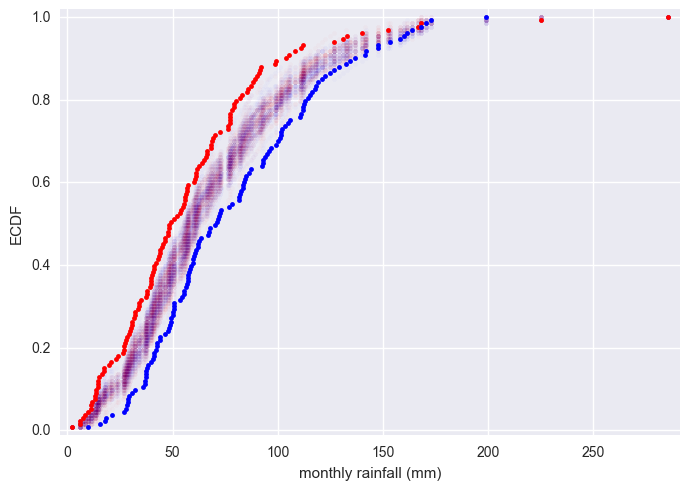

In [16]:
# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

### Test statistics
50xp

When performing hypothesis tests, your choice of test statistic should be:
Possible Answers

    something well-known, like the mean or median.
    be a parameter that can be estimated.
    be pertinent to the question you are seeking to answer in your hypothesis test.

    Take Hint (-15xp)

In [17]:
"Ans : 3"

'Ans : 3'

### What is a p-value?
50xp

The p-value is generally a measure of:
Possible Answers

    the probability that the hypothesis you are testing is true.
    
    the probability of observing your data if the hypothesis you are testing is true.
    
    the probability of observing a test statistic equally or more extreme than the one you observed, assuming the hypothesis you are testing is true.

In [18]:
"Ans : 3"

'Ans : 3'

### Generating permutation replicates
100xp

As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

Define a function with this signature: draw_perm_reps(data_1, data_2, func, size=1).

    Initialize an array to hold the permutation replicates using np.empty().
    Write a for loop to:
        Compute a permutation sample using your permutation_sample() function
        Pass the sample into func to compute the replicate and store the result in your array of replicates.
    Return the array of replicates.


In [19]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### Look before you leap: EDA before hypothesis testing
100xp

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

In [28]:
data = StringIO("""ind,ID,impact_force
20,A,1.612
21,A,0.605
22,A,0.327
23,A,0.946
24,A,0.541
25,A,1.539
26,A,0.529
27,A,0.628
28,A,1.453
29,A,0.297
30,A,0.703
31,A,0.269
32,A,0.751
33,A,0.245
34,A,1.182
35,A,0.515
36,A,0.435
37,A,0.383
38,A,0.457
39,A,0.730
60,B,0.172
61,B,0.142
62,B,0.037
63,B,0.453
64,B,0.355
65,B,0.022
66,B,0.502
67,B,0.273
68,B,0.720
69,B,0.582
70,B,0.198
71,B,0.198
72,B,0.597
73,B,0.516
74,B,0.815
75,B,0.402
76,B,0.605
77,B,0.711
78,B,0.614
79,B,0.468
""")

df = pd.read_csv(data, sep = ",")

In [33]:
df = df.set_index("ind")

In [34]:
df.shape

(40, 2)

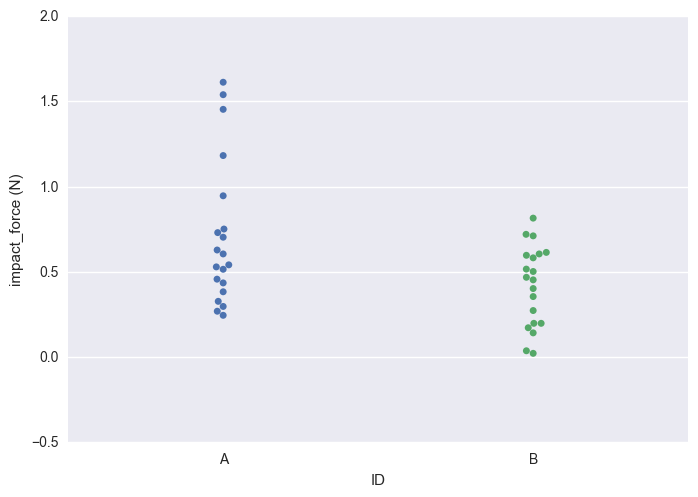

In [37]:
_ = sns.swarmplot(x="ID", y="impact_force", data=df)
_ = plt.xlabel("ID")
_ = plt.ylabel("impact_force (N)")
plt.show()

### Permutation test on frog data
100xp

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b.

In [38]:
force_a=np.array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])

In [39]:
force_b=np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

Define a function with call signature diff_of_means(data_1, data_2) that returns the differences in means between two data sets, mean of data_1 minus mean of data_2.

In [42]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

Use this function to compute the empirical difference of means that was observed in the frogs.

In [43]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

Draw 10,000 permutation replicates of the difference of means.

In [44]:
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

Compute the p-value.

In [47]:
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / float(len(perm_replicates))

In [48]:
# Print the result
print p

0.0055


### A one-sample bootstrap hypothesis test
100xp

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [51]:
np.mean(force_b),np.mean(force_a)

(0.41910000000000008, 0.70735000000000015)

Translate the impact forces of Frog B such that its mean is 0.55 N.

In [52]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

Use your draw_bs_reps() function to take 10,000 bootstrap replicates of the mean of your translated forces.

In [66]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        new_data = np.random.choice(data, len(data))
        bs_replicates[i] = func(new_data)
    return bs_replicates
    

In [67]:
# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

In [68]:
len(bs_replicates)

10000

Compute the p-value by finding the fraction of your bootstrap replicates that are less than the observed mean impact force of Frog B. Note that the variable of interest here is force_b.

In [69]:
# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000.0

In [70]:
# Print the p-value
print('p = ', p)

('p = ', 0.0054000000000000003)


### A bootstrap test for identical distributions
100xp

In the video, we looked at a one-sample test, but we can do two sample tests. We can even test the same hypothesis that we tested with a permutation test: that the Frog A and Frog B have identically distributed impact forces. To do this test on two arrays with n1 and n2 entries, we do a very similar procedure as a permutation test. We concatenate the arrays, generate a bootstrap sample from it, and take the first n1 entries of the bootstrap sample as belonging to the first data set and the last n2 as belonging to the second. We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for which the test statistic is less than what was observed.

Now, you will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

The two arrays are available to you as force_a and force_b.

Compute the observed difference in impact force using the diff_of_means() function you already wrote.

In [71]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = np.mean(force_a) - np.mean(force_b)

Create an array that is the concatenation of force_a and force_b.

In [74]:
# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a,force_b))

Initialize the bs_replicates array using np.empty() to store 10,000 bootstrap replicates.

In [75]:
# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

Write a for loop to

    Generate a bootstrap sample from the concatenated array.
    Compute the difference in means between the first len(force_a) last len(force_b) entries of the bootstrap sample.


In [76]:
for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])    

Compute and print the p-value from your bootstrap replicates.

In [77]:
# Compute and print p-value: p
p = np.sum(bs_replicates>empirical_diff_means) / float(len(bs_replicates))
print('p-value =', p)

('p-value =', 0.0058999999999999999)


### A two-sample bootstrap hypothesis test for difference of means.
100xp

You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects forces_concat and empirical_diff_means are already in your namespace.

Compute the mean of all forces (from forces_concat) using np.mean().

In [79]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

Generate shifted data sets for both force_a and force_b such that the mean of each is the mean of the concatenated array of impact forces.

In [80]:
# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays. 

In [81]:
# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

Compute the bootstrap replicates of the difference of means by subtracting the replicates of the shifted impact force of Frog B from those of Frog A.

In [82]:
# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

Compute and print the p-value from your bootstrap replicates.

In [83]:
# Compute and print p-value: p
p = np.sum(bs_replicates>empirical_diff_means) / float(len(bs_replicates))
print('p-value =', p)

('p-value =', 0.0061000000000000004)
